In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Soal 1

## Implementasi Tugas 1

In [2]:
# Menentukan seed untuk pembangkit random number
np.random.seed(13219043)

# Menentukan koefisien polinomial dan amplitude noise
# Koefisien polinomial diambil dari persamaan berikut
# (x-1)(x+1)(x-2)(x+2)(x-3)(x+3)(x-4)(x+4)(x-5)(x+5)
# = x^10 - 55x^8 + 1023x^6 - 7645x^4 + 21076x^2 - 14400
coef = [1, 0, -55, 0, 1023, 0, -7645, 0, 21076, 0, -14400]
noise_amp = 0.1

In [3]:
# Buat data sintetik
n = 100 # Jumlah data
x = np.linspace(-5, 5, n) # variabel independen
y_true = np.polyval(coef, x) # nilai y sebenarnya
y = y_true + noise_amp * np.random.randn(n) # nilai y yang diamati

In [4]:
# Buat matrix fitur polinomial dari x
poly = PolynomialFeatures(degree=10, include_bias=False)
X = poly.fit_transform(x.reshape(-1, 1))

In [5]:
# Implementasi Solusi Analitik
w = np.linalg.inv(X.T @ X) @ X.T @ y # vektor koefisien regresi

# Implementasi regresi linear menggunaakn sklearn
reg = LinearRegression(fit_intercept=False).fit(X, y)

In [6]:
# Membandingkan koefisien yang diperoleh dari kedua metode implementasi
print('Koefisien yang diperoleh dari solusi analitik:')
print(w)
print('Koefisien yang diperoleh dari sklearn:')
print(reg.coef_)

Koefisien yang diperoleh dari solusi analitik:
[ 2.01911023e-02  8.79225178e+03 -1.14512026e-02 -4.74365033e+03
  1.59063113e-03  7.45661609e+02 -7.78774834e-05 -4.34789821e+01
  1.23579488e-06  8.26903758e-01]
Koefisien yang diperoleh dari sklearn:
[ 2.01928870e-02  8.79225178e+03 -1.14510610e-02 -4.74365032e+03
  1.59052492e-03  7.45661609e+02 -7.78688131e-05 -4.34789821e+01
  1.23560312e-06  8.26903758e-01]


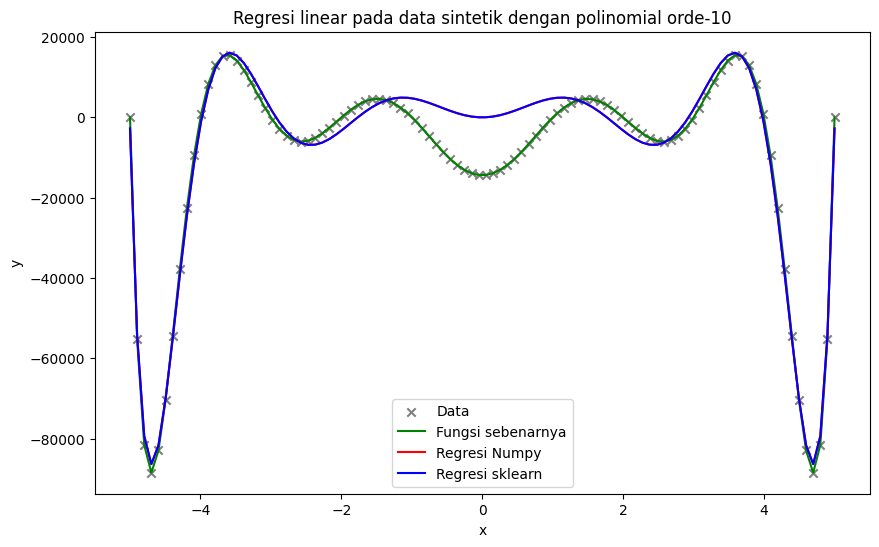

In [7]:
# Plot data dan hasil kurva regresi
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data", color="gray", marker="x")
plt.plot(x, y_true, label="Fungsi sebenarnya", color="green")
plt.plot(x, X @ w, label="Regresi Numpy", color="red")
plt.plot(x, reg.predict(X), label="Regresi sklearn", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresi linear pada data sintetik dengan polinomial orde-10")
plt.show()

Selanjutnya melakukan implementasi solusi analitik dan juga regresi linear menggunakan sklearn dan numpy setelah standardisasi fitur

In [8]:
X_scaled = StandardScaler().fit_transform(X)

# Implementasi regresi linear menggunaakn numpy & sklearn
w_scaled = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y # vektor koefisien regresi
reg_scaled = LinearRegression(fit_intercept=False).fit(X_scaled, y)

In [9]:
# Membandingkan koefisien yang diperoleh dari kedua implementasi
print("Koefisien dari implementasi Numpy dengan standardisasi fitur:")
print(w_scaled)
print("Koefisien dari implementasi sklearn dengan standardisasi fitur:")
print(reg_scaled.coef_)

Koefisien dari implementasi Numpy dengan standardisasi fitur:
[ 5.88726949e-02  1.60240897e+05 -5.57385555e-01 -1.32544020e+06
  1.57452736e+00  4.03002432e+06 -1.68248474e+00 -5.00676428e+06
  6.04430995e-01  2.13390277e+06]
Koefisien dari implementasi sklearn dengan standardisasi fitur:
[ 5.88734089e-02  1.60240897e+05 -5.57392233e-01 -1.32544020e+06
  1.57454788e+00  4.03002432e+06 -1.68250969e+00 -5.00676428e+06
  6.04441424e-01  2.13390277e+06]


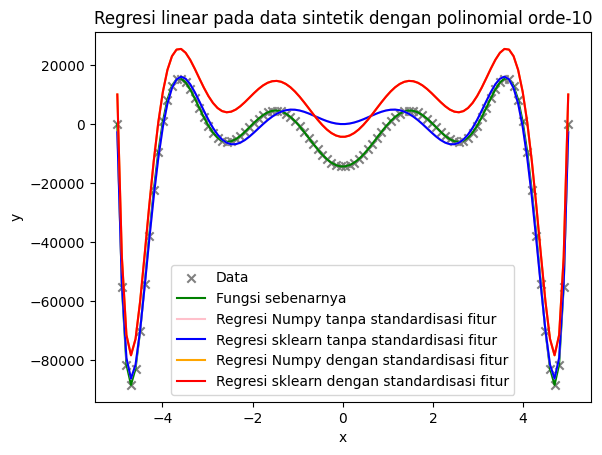

In [10]:
# Membuat plot data dan kurva regresi
plt.scatter(x, y, label="Data", color = "gray", marker="x")
plt.plot(x, y_true, label="Fungsi sebenarnya", color="green")
plt.plot(x, X @ w, label="Regresi Numpy tanpa standardisasi fitur", color="pink")
plt.plot(x, reg.predict(X), label="Regresi sklearn tanpa standardisasi fitur", color="blue")
plt.plot(x, X_scaled @ w_scaled, label="Regresi Numpy dengan standardisasi fitur", color="orange")
plt.plot(x, reg_scaled.predict(X_scaled), label="Regresi sklearn dengan standardisasi fitur", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresi linear pada data sintetik dengan polinomial orde-10")
plt.show()

## Analisis No. 1

### Percobaan 1:
Dari hasil plotting sebelum dilakukan standardisasi fitur, didapatkan hasil implementasi sudah memberikan hasil koefisien yang sama dengan hasil dari sklearn, sehingga dapat disimpulkan bahwa kedua metode menunjukkan hasil yang konsisten. Namun, jika diperhatikan kembali hasil yang diberikan masih lumayan jauh dari fungsi sebenarnya. Untuk membandingkan hasilnya, selanjutnya dilakukan standardisasi fitur terlebih dahulu sebelum melakukan pembuatan fungsi regresi

### Percobaan 2:
Berdasarkan hasil yang didapatkan setelah dilakukannya standardisasi fitur, dapat disimpulkan bahwa implementasi yang dilakukan sudah menghasilkan koefisien yang sama antara metode menggunakan solusi analitik maupun menggunakan library LinearRegression menggunakan sklearn. Namun jika dibandingkan dengan hasil yang didapatkan pada nomor 1, memang terdapat perbedaan yang disebabkan oleh standardisasi fitur. 
Hal ini disebabkan oleh perbedaan skala antara fitur-fitur polinomial yang digunakan dimana fitur-fitur ini memiliki skala yang berbeda-beda sehingga akan diperoleh koefisien regresi yang berbeda untuk menyesuaikan dengan skala tersebut. Dengan adanya standardisasi fitur, terdapat kesamaan skala antar tiap fitur sehingga memiliki rata-rata bernilai 0 dan standar deviasi bernilai satu sehingga koefisien yang diperoleh juga akan memiliki skala yang sama.


### Beberapa poin yang didapatkan:
1. Standardisasi fitur dapat meningkatkan stabilitas numerik dari solusi analitik karena matrix yang dihasilkan lebih dekat ke matrix identitas
2. Standardisasi fitur juga memudahkan interpretasi koefisien regresi dan mempercepat konvergensi algoritma optimasi yang digunakan
3. Standardisasi fitur menyebabkan hubungan antara variabel independen dan dependen dalam bentuk aslinya menjadi tersembunyi karena adanya scaling fitur

---

# Soal 2

## Implementasi Soal 2

In [11]:
# Import library tambahan yang belum diimport
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
"""Membaca dataset aqsoldb yang datanya diambil dari link berikut
https://www.kaggle.com/datasets/sorkun/aqsoldb-a-curated-aqueous-solubility-dataset/data"""

df = pd.read_csv("curated-solubility-dataset.csv")

In [13]:
# melihat 5 data pertama
df.head()

ID                                               Name  \
0  A-3         N,N,N-trimethyloctadecan-1-aminium bromide   
1  A-4                           Benzo[cd]indol-2(1H)-one   
2  A-5                               4-chlorobenzaldehyde   
3  A-8  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4  A-9  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   

                                               InChI  \
0  InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1  InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2        InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3  InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4  InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   

                      InChIKey  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                                              SMILES  Solubility   SD  \
0                [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127  0.0   
1                               O=C1Nc2cccc3cccc1c23   -3.254767  0.0   
2                                    Clc1ccc(C=O)cc1   -2.177078  0.0   
3  [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...   -3.924409  0.0   
4  C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065  0.0   

   Ocurrences Group    MolWt  ...  NumRotatableBonds  NumValenceElectrons  \
0           1    G1  392.510  ...               17.0                142.0   
1           1    G1  169.183  ...                0.0                 62.0   
2           1    G1  140.569  ...                1.0                 46.0   
3           1    G1  756.226  ...               10.0                264.0   
4           1    G1  422.525  ...               12.0                164.0   

   NumAromaticRings  NumSaturatedRings  NumAliphaticRings  RingCount    TPSA  \
0               0.0                0.0                0.0        0.0    0.00   
1               2.0                0.0                1.0        3.0   29.10   
2               1.0                0.0                0.0        1.0   17.07   
3               6.0                0.0                0.0        6.0  120.72   
4               2.0                4.0                4.0        6.0   56.60   

    LabuteASA      BalabanJ      BertzCT  
0  158.520601  0.000000e+00   210.377334  
1   75.183563  2.582996e+00   511.229248  
2   58.261134  3.009782e+00   202.661065  
3  323.755434  2.322963e-07  1964.648666  
4  183.183268  1.084427e+00   769.899934  

[5 rows x 26 columns]

In [14]:
# Mendapatkan informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

In [15]:
# Mengecek apakah terdapat nilai null pada dataset
df.isnull().sum()

ID                     0
Name                   0
InChI                  0
InChIKey               0
SMILES                 0
Solubility             0
SD                     0
Ocurrences             0
Group                  0
MolWt                  0
MolLogP                0
MolMR                  0
HeavyAtomCount         0
NumHAcceptors          0
NumHDonors             0
NumHeteroatoms         0
NumRotatableBonds      0
NumValenceElectrons    0
NumAromaticRings       0
NumSaturatedRings      0
NumAliphaticRings      0
RingCount              0
TPSA                   0
LabuteASA              0
BalabanJ               0
BertzCT                0
dtype: int64

Terlihat bahwa data sudah bersih dan memiliki nilai secara keseluruhan

In [16]:
# Mendapatkan nama-nama kolom dari dataset
df.columns

Index(['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Solubility', 'SD',
       'Ocurrences', 'Group', 'MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')

d:\Application\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


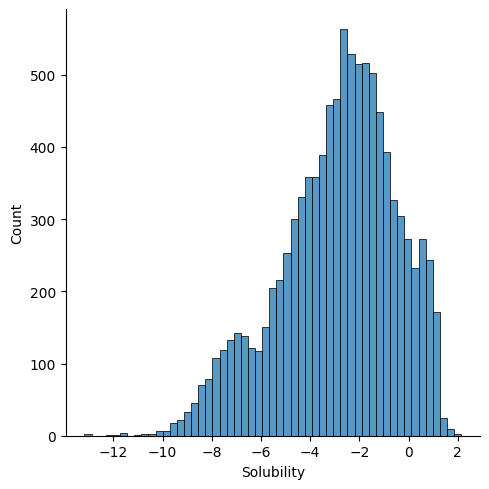

In [17]:
# Plot histogram
sns.displot(df.Solubility)
plt.show()

In [18]:
# Mengambil feature-feature yang ingin dianalisis dan membuatnya menjadi dataframe baru
feature_start = list(df.columns).index("MolWt")
feature_names = df.columns[feature_start:]

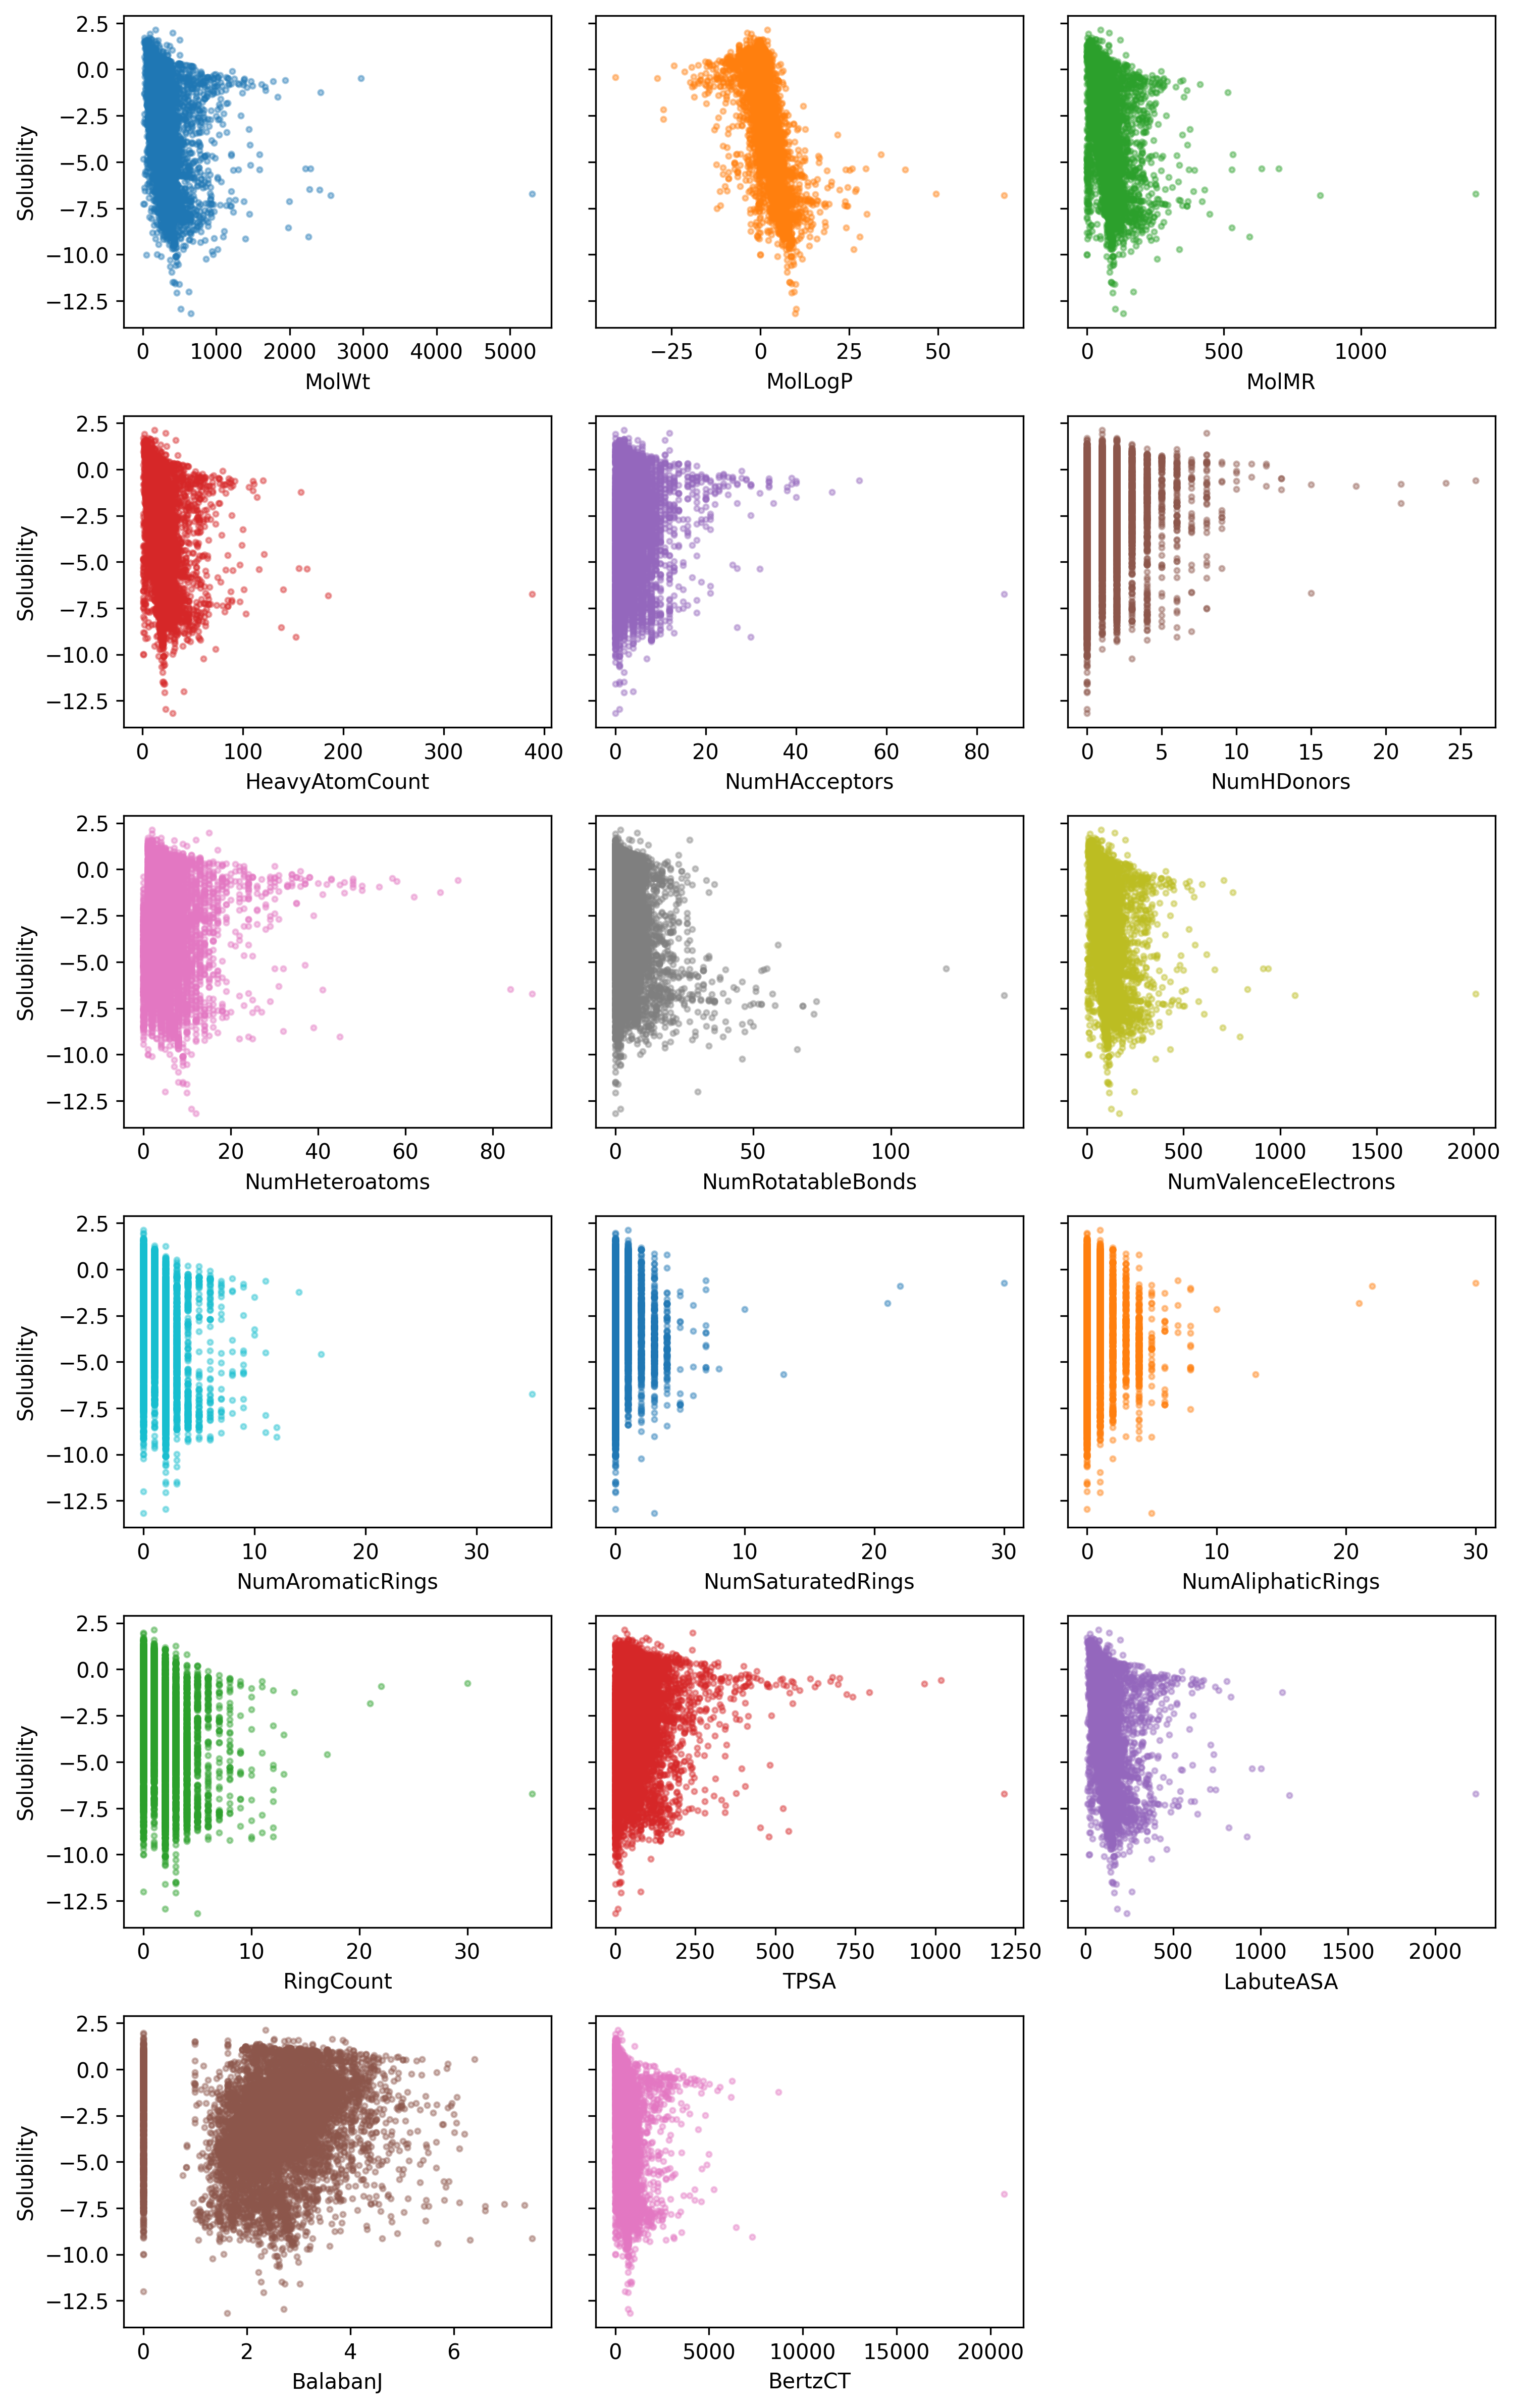

In [19]:
# Membuat plot scatter untuk setiap feature
fig, axs = plt.subplots(nrows=6, ncols=3, sharey=True, figsize=(10, 16), dpi=300)
axs = axs.flatten()
for i, n in enumerate(feature_names):
    axs[i].scatter(df[n], df.Solubility, s=6, alpha=0.4, color=f"C{i}")
    if i % 3 == 0:
        axs[i].set_ylabel("Solubility")
    axs[i].set_xlabel(n)

# Menyembunyikan subplot yang kosong
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [20]:
features = df.loc[:, feature_names].values
target = df.Solubility.values
feature_dim = features.shape[1]

print(f"Jumlah fitur: {feature_dim}")
print(f"Feature names:\n {feature_names}")

Jumlah fitur: 17
Feature names:
 Index(['MolWt', 'MolLogP', 'MolMR', 'HeavyAtomCount', 'NumHAcceptors',
       'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds',
       'NumValenceElectrons', 'NumAromaticRings', 'NumSaturatedRings',
       'NumAliphaticRings', 'RingCount', 'TPSA', 'LabuteASA', 'BalabanJ',
       'BertzCT'],
      dtype='object')


In [44]:
# Define model
model = LinearRegression().fit(features, target)

# Predict target
target_pred = model.predict(features)

# Calculate RMSE and R2 score
rmse = np.sqrt(mean_squared_error(target, target_pred))
r2 = model.score(features, target)

# Print koefisien dan intercept
print("Koefisien:")
print(model.coef_)
print("Intercept:")
print(model.intercept_)


Koefisien:
[-0.00476603 -0.44367598  0.01455881 -0.4734423   0.1085899   0.14979819
 -0.12915866  0.04084007  0.07663386 -0.29964953  0.13950952 -0.04278944
 -0.34243896 -0.00325231 -0.01077072 -0.02663261  0.00447931]
Intercept:
-0.5853188749769833


In [22]:
# Print RMSE dan R2 score
print(f"RMSE: {rmse} and R2 score: {r2}")

RMSE: 1.6505305477970256 and R2 score: 0.5141853614726429


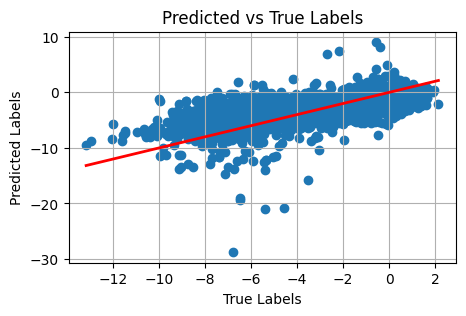

In [43]:
# Plot data dan hasil prediksi terhadap data secara keseluruhan
plt.figure(figsize=(5, 3))
plt.scatter(target, target_pred, marker="o")
# buat garis regresi linear
plt.plot([target.min(), target.max()], [target.min(), target.max()], lw=2, color="red")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.grid(True)
plt.title("Predicted vs True Labels")
plt.show()

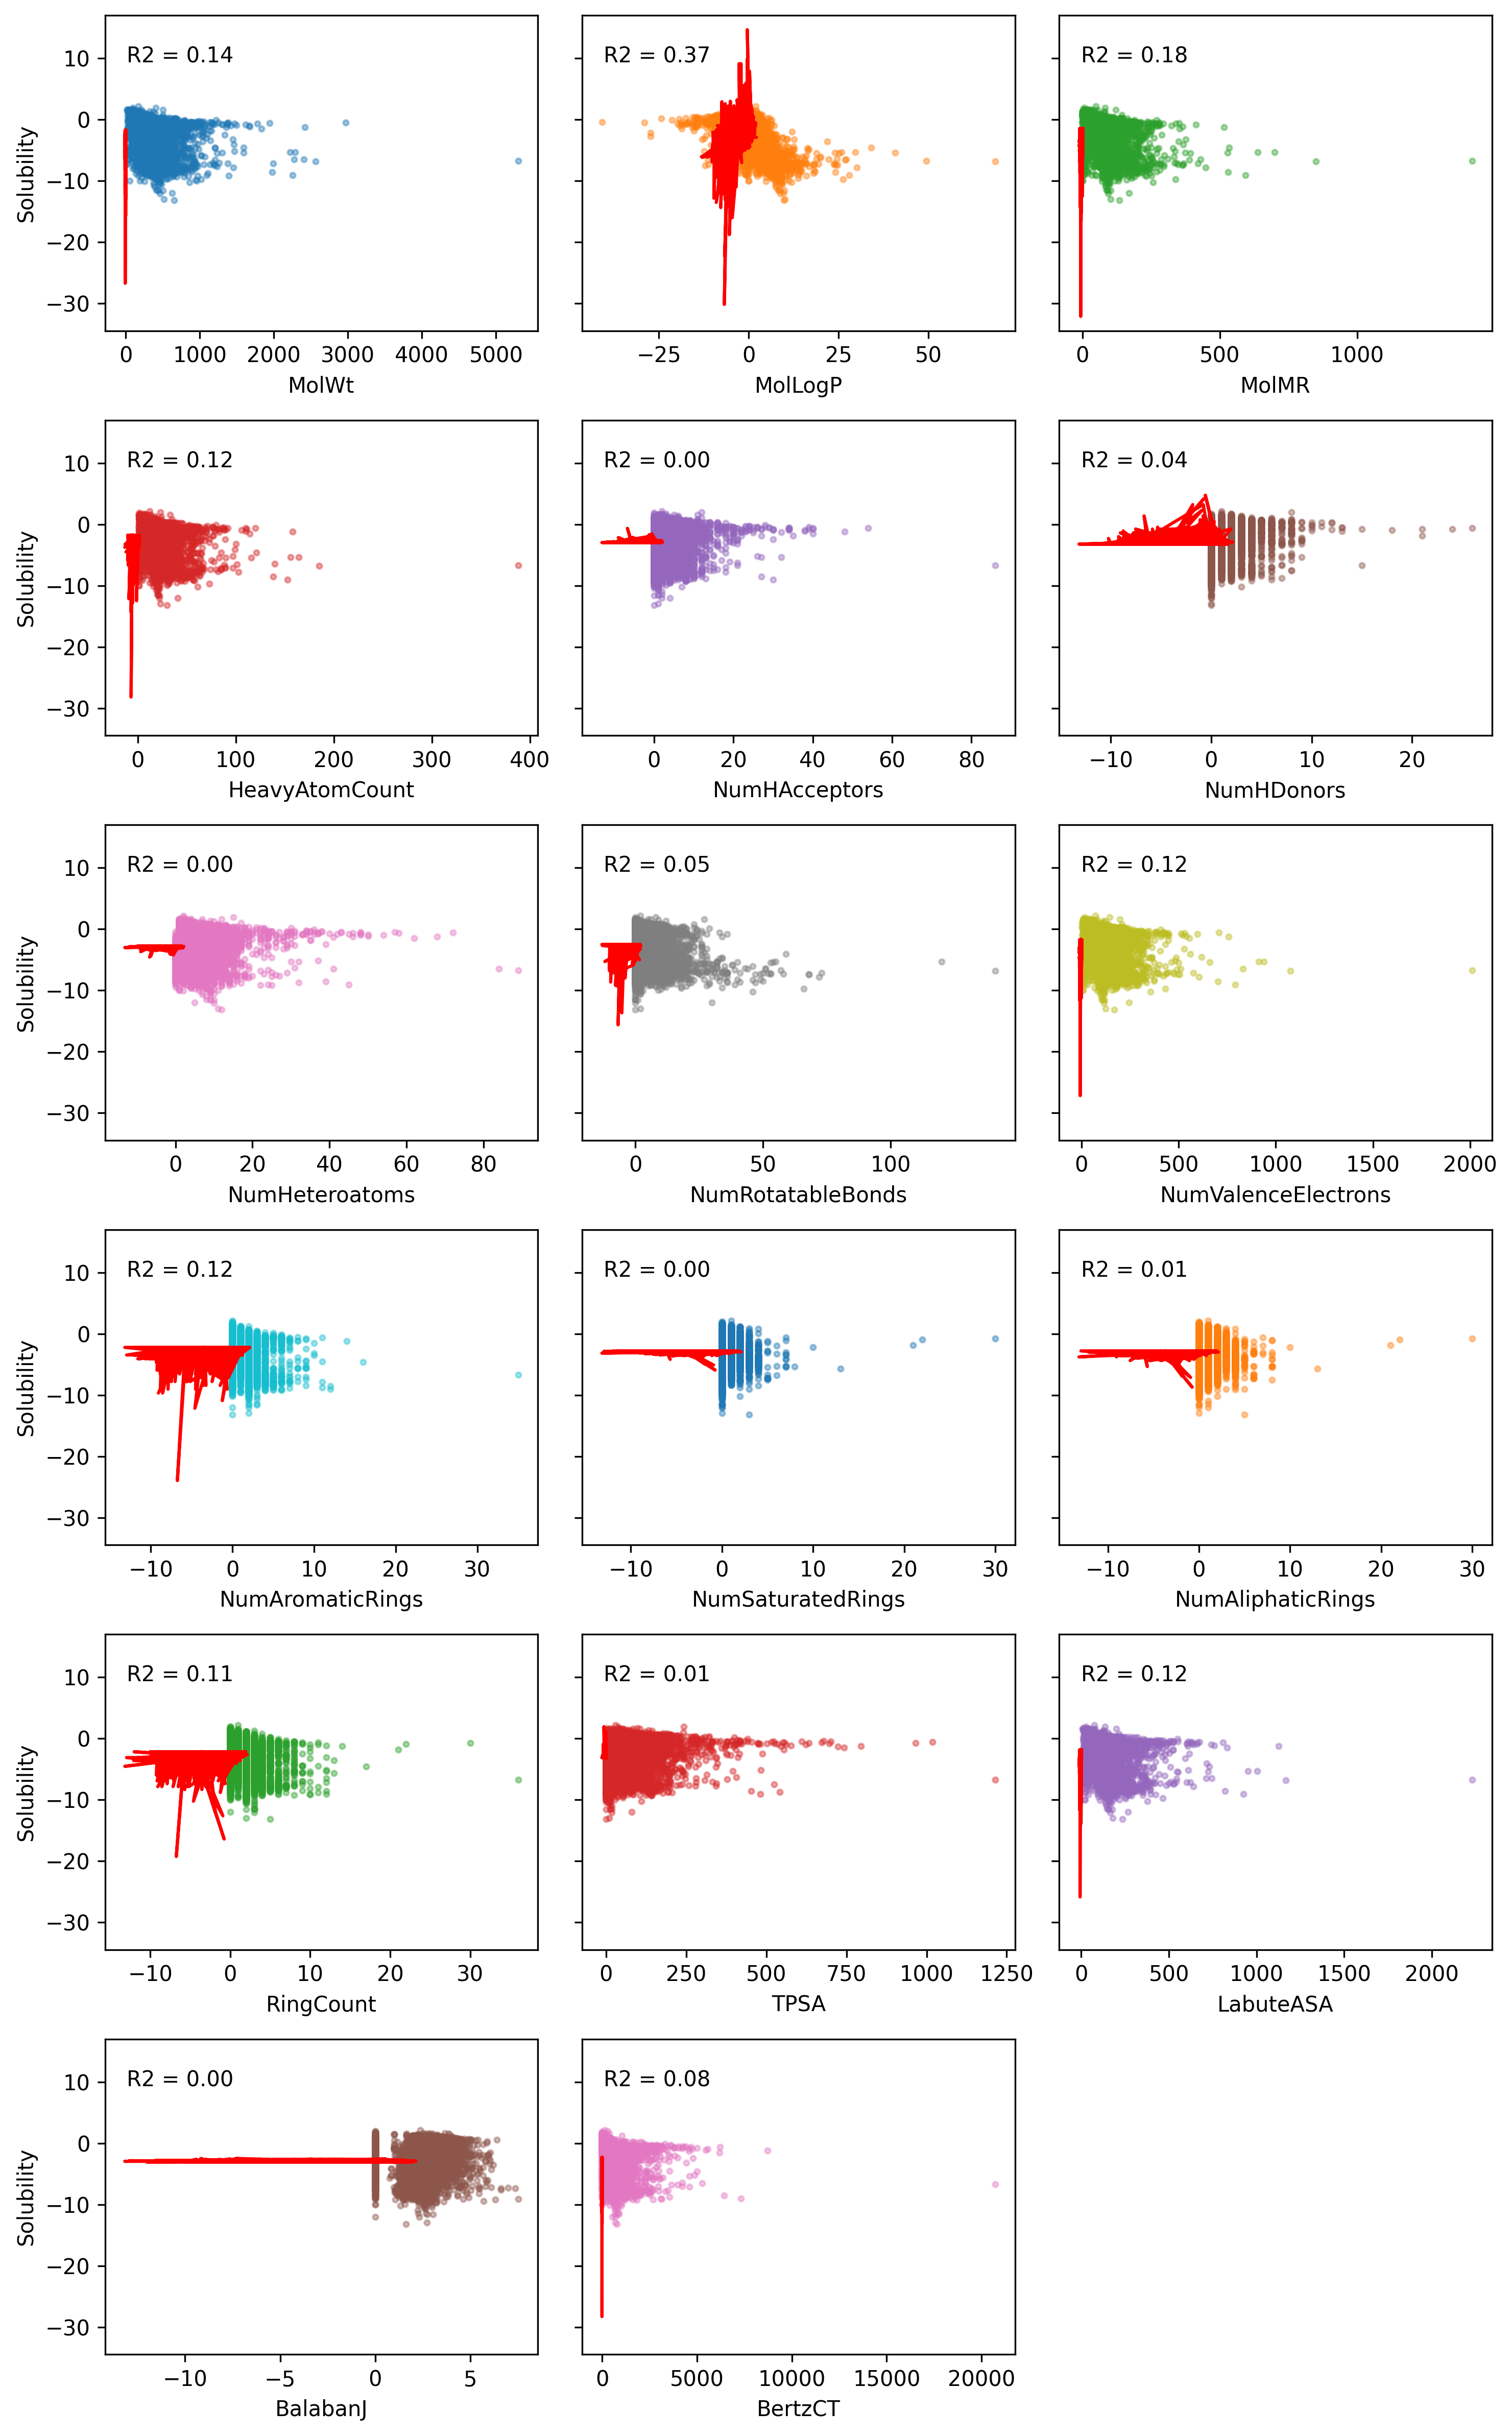

In [53]:
# Membuat regresi linear untuk setiap feature
fig, axs = plt.subplots(nrows=6, ncols=3, sharey=True, figsize=(10, 16), dpi=300)
axs = axs.flatten()
for i, n in enumerate(feature_names):
    axs[i].scatter(df[n], df.Solubility, s=6, alpha=0.4, color=f"C{i}")
    x = features[:, i].reshape(-1, 1)
    model = LinearRegression().fit(x, target)
    y_predict = model.predict(x)
    axs[i].plot(target, y_predict, color="red")
    if i % 3 == 0:
        axs[i].set_ylabel("Solubility")
    axs[i].set_xlabel(n)
    # Menambahkan nilai R2 pada setiap subplot
    axs[i].text(0.05, 0.85, f"R2 = {model.score(x, target):.2f}", transform=axs[i].transAxes)
    
# Menyembunyikan subplot yang kosong
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [24]:
# Untuk membuat perhitungan loss, kita gunakan library jax sebagai berikut.
import jax
import jax.numpy as jnp

In [25]:
# define jax function
def linear_model(x, w, b):
    return jnp.dot(x, w) + b

def loss(y, target):
    return jnp.mean((y - target)**2)

def loss_wrapper(w, b, data):
    return loss(linear_model(data[0],w,b), data[1])

In [26]:
# Inisialisasi parameter
np.random.seed(13219043)
w2 = np.random.normal(size=feature_dim)
b2 = 0.0

In [28]:
# Menghitung loss awal
print(f"loss awal: {loss(linear_model(features, w2, b2), target)}")

loss_grad = jax.grad(loss_wrapper, (0,1))

# Menghitung loss gradient
print(f"loss gradient: {loss_grad(w2, b2, (features, target))}")

loss awal: 374144.6875
loss gradient: (Array([-2.8741925e+05, -1.3092286e+03, -7.1776594e+04, -1.9732078e+04,
       -4.6211577e+03, -1.0947407e+03, -6.4045391e+03, -3.2624351e+03,
       -1.0075907e+05, -1.7962969e+03, -2.0442892e+02, -4.5250720e+02,
       -2.2488098e+03, -7.8106484e+04, -1.2158398e+05, -8.9526221e+02,
       -8.3154981e+05], dtype=float32), Array(-531.58093, dtype=float32, weak_type=True))


In [38]:
loss_progress = []
eta = 1e-6
data = (features, target)
for i in range(20):
    w2 -= eta * loss_grad(w2, b2, data)[0]
    b2 -= eta * loss_grad(w2, b2, data)[1]
    loss_progress.append(loss_wrapper(w2, b2, data))

In [39]:
print(f"Last loss: {loss_progress[-1]}")

Last loss: 70.9845199584961


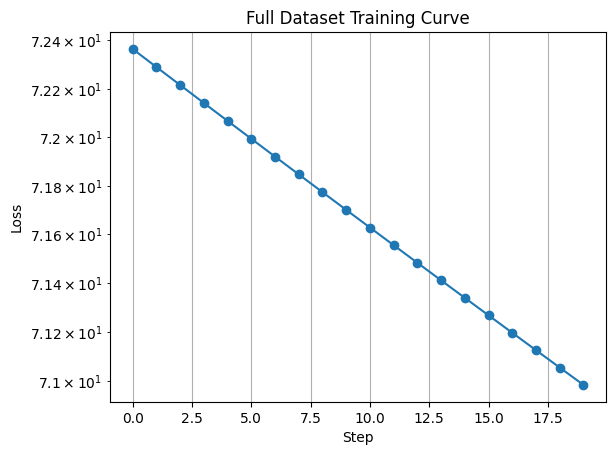

In [40]:
# Membuat plotting loss
plt.plot(loss_progress, marker="o")
plt.xlabel("Step")
plt.yscale("log")
plt.ylabel("Loss")
plt.grid(True)
plt.title("Full Dataset Training Curve")
plt.show()

## Analisis Tugas 2:

1. Proses pengerjaan regresi linear dengan menggunakan sklearn sudah dilakukan dengan memanfaatkan LinearRegression pada dataset `aqsoldb` menggunakan seluruh data. Hasil yang diberikan sudah cukup baik dalam memprediksi solubilitas dari data `aqsoldb`. Namun, masih terdapat beberapa data yang memiliki selisih sangat besar antara nilai sebenarnya dan prediksinya. Hal ini disebabkan oleh beberapa faktor seperti:
    - Kurangnya fitur yang dapat menjelaskan variasi solubilitas secara lengkap
    - Adanya noise atau outlier yang tidak diproses lebih lanjut sebelum dilakukan modeling, dll.
2. Plot paritas menunjukkan bagaimana persebaran tiap fitur terhadap solubity dan sudah dilakukan dengan baik
3. Kemudian, juga dilakukan perhitungan untuk mendapatkan RMSE dan $R^2$ dengan nilai yang diperoleh yaitu $RMSE: 1.65$ dan $R^2$ $score: 0.5142$
4. Selanjutnya juga dilakukan perhitungan nilai loss dari data yang dimiliki dan didapatkan nilai loss terkecil yaitu $Loss = 70.985$

---

# Soal 3

## Implementasi Soal 3

In [55]:
# Menambahkan library yang dibutuhkan
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, scale
from sklearn.impute import SimpleImputer

In [59]:
# Memanggil kembali dataframe features untuk diolah pada soal 3
features_soal3 = df.loc[:, feature_names].values
target_soal3 = df.Solubility.values

In [60]:
# Lakukan preprocessing data
features_scaled = scale(features_soal3)

In [62]:
# Define model
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation="relu",
    solver="adam",
    max_iter = 100
)

mlp.fit(features_scaled, target_soal3)

d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=100)

In [63]:
# Predict target
target_pred = mlp.predict(features_scaled)

# Menghitung RMSE dan R2 score
rmse = np.sqrt(mean_squared_error(target_soal3, target_pred))
r2 = mlp.score(features_scaled, target_soal3)

# Print RMSE dan R2 score
print(f"RMSE: {rmse} and R2 score: {r2}")

RMSE: 1.0546480147357142 and R2 score: 0.801647105425398


In [64]:
# buatkan kembali model dengan hidden_layer_sizes yang berbeda-beda dalam for loop
mlp_list = []
rmse_mlp_list, r2_mlp_list = [], []
# berikut adalah kombinasi hidden_layer_sizes yang digunakan dalam 2 dimensi
hidden_layer_sizes = [(100, 50), (50, 25), (100, 25),
                      (50, 50), (100, 100), (50, 100)]

for i, hls in enumerate(hidden_layer_sizes):
    mlp_list.append(MLPRegressor(
        hidden_layer_sizes=hls,
        activation="relu",
        solver="adam",
        max_iter = 100
    ))
    mlp_list[i].fit(features_scaled, target_soal3)
    target_pred = mlp_list[i].predict(features_scaled)
    rmse_mlp_list.append(np.sqrt(mean_squared_error(target_soal3, target_pred)))
    r2_mlp_list.append(mlp_list[i].score(features_scaled, target_soal3))

d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

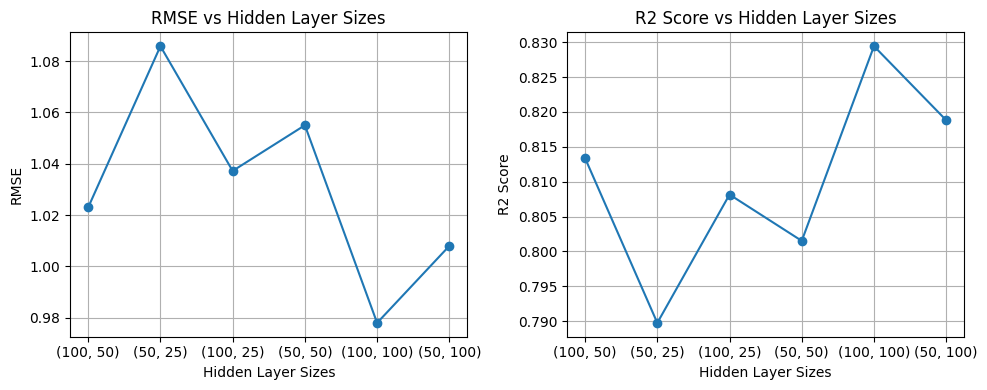

In [65]:
# Buat plotting RMSE dan R2 score
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(rmse_mlp_list, marker="o")
plt.xticks(range(len(hidden_layer_sizes)), hidden_layer_sizes)
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("RMSE")
plt.grid(True)
plt.title("RMSE vs Hidden Layer Sizes")
plt.subplot(122)
plt.plot(r2_mlp_list, marker="o")
plt.xticks(range(len(hidden_layer_sizes)), hidden_layer_sizes)
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("R2 Score")
plt.grid(True)
plt.title("R2 Score vs Hidden Layer Sizes")
plt.tight_layout()
plt.show()

In [68]:
# Print nilai RMSE dan R2 score terbaik
print(f"Best RMSE: {min(rmse_mlp_list)}")
print(f"Best R2 score: {max(r2_mlp_list)}")

Best RMSE: 0.9779987880779135
Best R2 score: 0.8294310025514776


## Analisis Soal 3

### Analisis Grafik
Berdasarkan grafik di atas terlihat bahwa parameter hidden_layer_sizes terbaik untuk model yang digunakan adalah (100,100) dengan nilai $R^2$ $score: 0.83$ dan $RMSE: 0.98$

### Perbandingan hasil implementasi soal 2 dan soal 3
Berdasarkan percobaan yang dilakukan, didapatkan bahwa hasil pemodelan menggunakan `model MLPRegressor dapat memberikan hasil yang lebih baik daripada model Linear Regression` yang telah digunakan pada soal sebelumnya. Pada model Linear Regression sebelumnya, didapatkan $RMSE: 1.65$ dan $R^2$ $score: 0.5142$. Dengan menggunakan MLPRegressor, hasil yang didapatkan jauh meningkat yaitu $R^2$ $score: 0.83$ dan $RMSE: 0.98$. Hal ini menunjukkan bahwa model MLPRegressor dapat menjelaskan varians dari label sebenarnya lebih baik dan memiliki kesalahan prediksi yang lebih kecil daripada model linear.

---

# Soal 4

## Implementasi Soal 4

In [69]:
# memanggil kembali dataframe features untuk diolah pada soal 4
features_soal4 = df.loc[:, feature_names].values
target_soal4 = df.Solubility.values

In [ ]:
# Lakukan preprocessing data
features_scaled = scale(features_soal4)

In [103]:
# Gunakan fungsi train_test_split untuk membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_soal4, test_size=0.33)

In [104]:
# Define Model
reg_linear = LinearRegression().fit(X_train, y_train)
reg_mlp = MLPRegressor(
    hidden_layer_sizes=(100, 100),
    activation="relu",
    solver="adam",
    max_iter = 100
).fit(X_train, y_train)

d:\Application\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [105]:
# Predict target
target_train_pred_linear = reg_linear.predict(X_train)
target_test_pred_linear = reg_linear.predict(X_test)
target_train_pred_mlp = reg_mlp.predict(X_train)
target_test_pred_mlp = reg_mlp.predict(X_test)

In [106]:
# Menghitung RMSE dan R2 score untuk linear regression
rmse_train_linear = np.sqrt(mean_squared_error(y_train, target_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, target_test_pred_linear))
r2_train_linear = reg_linear.score(X_train, y_train)
r2_test_linear = reg_linear.score(X_test, y_test)


In [107]:
# Print RMSE dan R2 score untuk linear regression
print("Linear Regression:")
print(f"RMSE train: {rmse_train_linear}\nRMSE test: {rmse_test_linear}")
print(f"R2 score train: {r2_train_linear}\nR2 score test: {r2_test_linear}")

Linear Regression:
RMSE train: 1.6193222104294442
RMSE test: 1.7591445574811764
R2 score train: 0.5370416786726023
R2 score test: 0.4365668896409285


In [108]:
# Menghitung RMSE dan R2 score untuk MLP
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, target_train_pred_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, target_test_pred_mlp))
r2_train_mlp = reg_mlp.score(X_train, y_train)
r2_test_mlp = reg_mlp.score(X_test, y_test)

In [109]:
# Print RMSE dan R2 score untuk MLP
print("MLP Regressor:")
print(f"RMSE train: {rmse_train_mlp}\nRMSE test: {rmse_test_mlp}")
print(f"R2 score train: {r2_train_mlp}\nR2 score test: {r2_test_mlp}")

MLP Regressor:
RMSE train: 0.9944448340863068
RMSE test: 1.1373980761815563
R2 score train: 0.8254030143918947
R2 score test: 0.7644602089086094


Text(0.1, 0.9, 'R^2 = 0.764\nRMSE = 1.137')

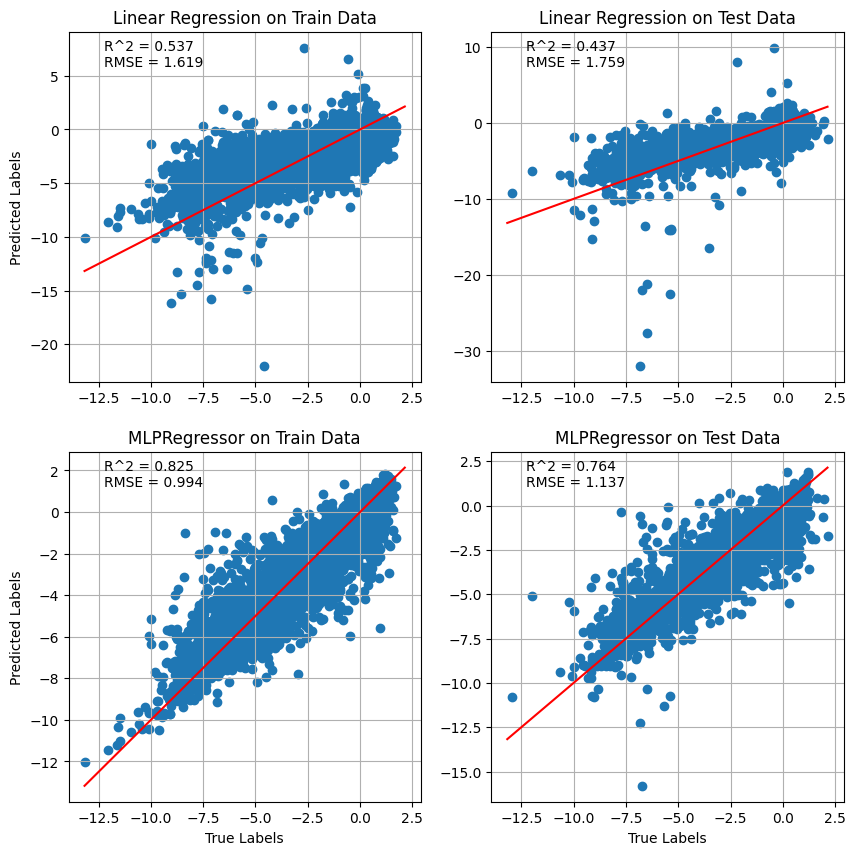

In [110]:
# Membuat plot paritas antara target sebenarnya dan hasil prediksi untuk data training dan data testing
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
xmin = min(y_train.min(), y_test.min())
xmax = max(y_train.max(), y_test.max())

axes[0, 0].scatter(y_train, target_train_pred_linear, marker="o")
axes[0, 0].set_ylabel("Predicted Labels")
axes[0, 0].set_title("Linear Regression on Train Data")
axes[0, 0].grid(True)
axes[0, 0].plot([xmin, xmax], [xmin, xmax], color="red")
axes[0, 0].text(0.1, 0.9, f"R^2 = {r2_train_linear:.3f}\nRMSE = {rmse_train_linear:.3f}", transform=axes[0, 0].transAxes)

axes[0, 1].scatter(y_test, target_test_pred_linear, marker="o")
axes[0, 1].set_title("Linear Regression on Test Data")
axes[0, 1].grid(True)
axes[0, 1].plot([xmin, xmax], [xmin, xmax], color="red")
axes[0, 1].text(0.1, 0.9, f"R^2 = {r2_test_linear:.3f}\nRMSE = {rmse_test_linear:.3f}", transform=axes[0, 1].transAxes)

axes[1, 0].scatter(y_train, target_train_pred_mlp, marker="o")
axes[1, 0].set_xlabel("True Labels")
axes[1, 0].set_ylabel("Predicted Labels")
axes[1, 0].set_title("MLPRegressor on Train Data")
axes[1, 0].grid(True)
axes[1, 0].plot([xmin, xmax], [xmin, xmax], color="red")
axes[1, 0].text(0.1, 0.9,f"R^2 = {r2_train_mlp:.3f}\nRMSE = {rmse_train_mlp:.3f}", transform=axes[1 , 0].transAxes)

axes[1 , 1].scatter(y_test , target_test_pred_mlp , marker="o")
axes[1 , 1].set_xlabel("True Labels")
axes[1 , 1].set_title("MLPRegressor on Test Data")
axes[1 , 1].grid(True)
axes[1 , 1].plot([xmin, xmax], [xmin, xmax], color="red")
axes[1 , 1].text(0.1 , 0.9,f"R^2 = {r2_test_mlp:.3f}\nRMSE = {rmse_test_mlp:.3f}" , transform=axes [1 , 1 ].transAxes)

## Analisis Soal 4

1. Percobaan dilakukan dengan membagi testing data sebanyak 33% dan selebihnya merupakan training data. Data tersebut sebelum dibagi dilakukan scaling terlebih dahulu.
2. Berdasarkan percobaan yang dilakukan, didapatkan hasil seperti berikut.
    |   Category  | Linear Regression | MLP Regressor |
    |:----------|:------------------|:--------------|
    | RMSE train | 1.619 | 0.994 |
    | RMSE test | 1.759 | 1.137 |
    | $R^2$ score train | 0.537 | 0.825 |
    | $R^2$ score test | 0.436 | 0.764 |
    
    Terlihat pada setiap kategori yang ada nilai MLP Regressor lebih baik daripada linear regression meskipun dataset sudah dibagi menjadi testing data dan training data. Hal ini menunjukkan bahwa kemampuan MLP Regressor dalam memprediksi hasil jauh lebih mendekati nilai aslinya dibandingkan linear regression.    

# Soal 5

## Implementasi Soal 5

### Penjelasan Mengenai K-fold cross validation
- Pengertian
    `K-fold cross validation` merupakan sebuah teknik yang dapat mengevaluasi kinerja model pada machine learning dengan menggunakan data yang terbatas. Teknik ini bekerja dengan cara membagi data menjadi k kelompok atau lipatan yang berukuran seimbang, kemudian menggunakan salah satu lipatan sebagai data uji dan sisanya sebagai data latih. Proses ini diulangi sebanyak `k` kali, dengan menggunakan lipatan yang berbeda sebagai data uji setiap kali. Hasil evaluasi model dihitung sebagai rata-rata dari k hasil yang diperoleh.
    
    Sumber: https://machinelearningmastery.com/k-fold-cross-validation/
- Fungsi
    `K-fold cross validation` berfungsi untuk membantu mengurangi bias atau kesalahan sistematis yang mungkin terjadi ketika kita hanya menggunakan satu pembagian training data dan testing data. Dengan menggunakan k-fold cross validation, kita dapat memanfaatkan seluruh data yang ada untuk melatih dan menguji model sehingga mendapatkan estiamsi kinerja model yang lebih baik.
- Ilustrasi Cara Kerja Cross Validation untuk k = 5

    | Percobaan ke-| Split Data 1 | Split Data 2 | Split Data 3 | Split Data 4 | Split Data 5 |
    |:---|:---|:---|:---|:---|:---|
    | Percobaan 1 | `Test` | Train | Train | Train | Train |
    | Percobaan 2 | Train | `Test` | Train | Train | Train |
    | Percobaan 3 | Train | Train | `Test` | Train | Train |
    | Percobaan 4 | Train | Train | Train | `Test` | Train |
    | Percobaan 5 | Train | Train | Train | Train | `Test` |

    Terlihat bahwa pada tabel di atas merupakan hasil percobaan `5-fold cross validation` yang artinya melakukan percobaan sebanyak 5 kali tahapan. Tiap hasil akan dicatat nilai performa model tersebut menggunakan `confussion matrix`, kemudian didapatkan nilai rata-rata dari setiap percobaan. Dari matrix inilah akan ditemukan percobaan mana yang dapat dijadikan acuan dari penggunaan suatu model algoritma yang telah terpilih.
    
    Sumber: https://www.pengalaman-edukasi.com/2020/04/apa-itu-k-fold-cross-validation.html

### Implementasi K-fold Cross Validation pada Python tanpa Library

In [133]:
# Pembuatan data sintetik akan menggunakan data yang sama dengan percobaan pada soal 1

# Menentukan seed untuk pembangkit random number
np.random.seed(13219043)

# Menentukan koefisien polinomial dan amplitude noise
# Koefisien polinomial diambil dari persamaan berikut
# (x-1)(x+1)(x-2)(x+2)(x-3)(x+3)(x-4)(x+4)(x-5)(x+5)
# = x^10 - 55x^8 + 1023x^6 - 7645x^4 + 21076x^2 - 14400
coef = [1, 0, -55, 0, 1023, 0, -7645, 0, 21076, 0, -14400]
noise_amp = 0.1

In [134]:
# Buat data sintetik
n = 100 # Jumlah data
x = np.linspace(-5, 5, n) # variabel independen
y_true = np.polyval(coef, x) # nilai y sebenarnya
y = y_true + noise_amp * np.random.randn(n) # nilai y yang diamati

In [135]:
# Menentukan nilai k untuk k-fold cross validation dan acak urutan data
k = 10

idx = np.arange(n)
np.random.shuffle(idx) # mengacak urutan data
x_awal = x[idx] # x yang sudah diacak
y_awal = y[idx] # y yang sudah diacak

In [136]:
# Bagi data menjadi k bagian yang sama besar
folds = np.array_split(idx, k)

# Membuat rentang orde polinomial yang akan diuji
orde_poly = np.arange(1, 11) # dari 1 sampai 10

In [137]:
# Inisialisasi variabel untuk menyimpan nilai rata-rata MSE dari setiap orde polinomial
mse_mean = np.zeros(len(orde_poly))

In [141]:
# Untuk setiap orde polinomial
for i, orde in enumerate(orde_poly):
    # Inisialisasi variabel untuk menyimpan nilai MSE dari setiap fold
    mse_fold = np.zeros(k)
    
    # Lakukan validasi silang untuk setiap fold
    for j, fold in enumerate(folds):
        # Jadikan fold sebagai testing data, dan sisanya sebagai training data
        X_test = x_awal[fold].reshape(-1, 1)
        y_test = y_awal[fold]
        X_train = x_awal[~fold].reshape(-1, 1)
        y_train = y_awal[~fold]
        
        # Buat fitur polinomial dari training data dan testing data sesuai dengan orde polinomial
        poly = PolynomialFeatures(degree=orde)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        # Lakukan regresi polinomial pada data latih, dan dapatkan koefisien regresi
        reg = LinearRegression(fit_intercept=False).fit(X_train_poly, y_train)
        w = reg.coef_
        
        # Hitung nilai RMSE pada testing data
        y_pred = np.polyval(w[::-1], X_test)
        mse_fold[j] = mean_squared_error(y_test, y_pred)
    
    mse_mean[i] = np.mean(mse_fold)

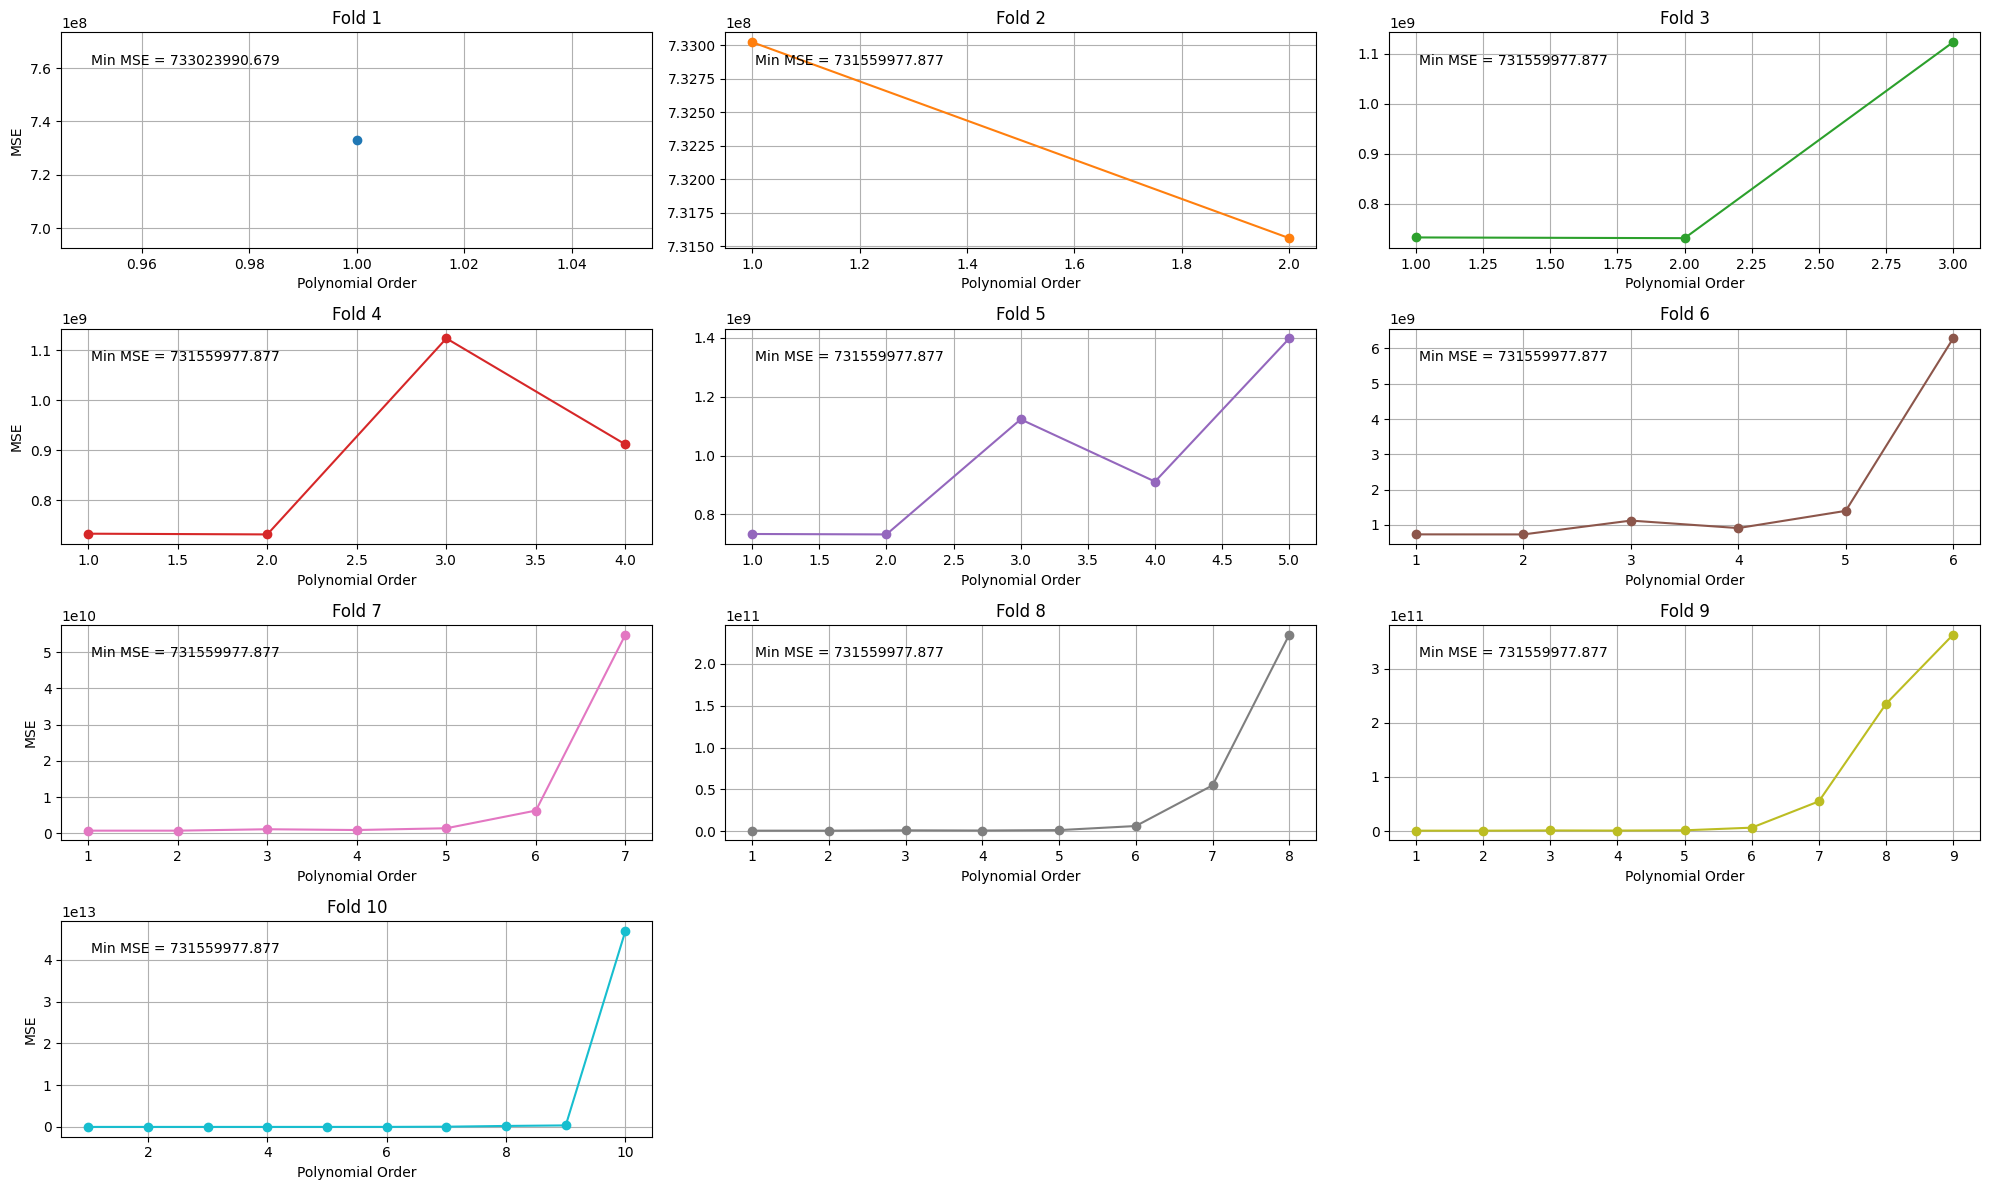

In [142]:
# Plot MSE rata-rata terhadap orde polinomial sebanyak 10 kali dengan panjang yang berbeda-beda dari 1 sampai 10
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 12))

for i, ax in enumerate(axes.flatten()):
    ax.plot(orde_poly[:i+1], mse_mean[:i+1], marker="o", color = f"C{i}")
    ax.set_xlabel("Polynomial Order")
    ax.set_title(f"Fold {i+1}")
    if i % 3 == 0:
        ax.set_ylabel("MSE")
    ax.grid(True)
    ax.text(0.05, 0.85, f"Min MSE = {mse_mean[:i+1].min():.3f}", transform=ax.transAxes)

# Menyembunyikan subplot yang kosong
for i in range(len(orde_poly), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [144]:
# Pilih orde polinomial terbaik dengan nilai rata-rata MSE terkecil
print(f"Best polynomial order: {orde_poly[np.argmin(mse_mean)]}")

Best polynomial order: 2
